#Data basecalled on longus2 using: erikson@deep22:/data/manke/processing1/erikson$ /localenv/pipegrp/dorado-1.1.1-linux-x64/bin/dorado basecaller --models-directory /localenv/pipegrp/dorado-1.1.1-linux-x64/models --reference /data/repository/organisms/dm6_ensembl/genome_fasta/genome.fa -x cuda:all -o bam  hac@v5.2.0,m6A_DRACH output.pod5

AND

erikson@deep22:/data/manke/processing1/erikson$ /localenv/pipegrp/dorado-1.1.1-linux-x64/bin/dorado basecaller --models-directory /localenv/pipegrp/dorado-1.1.1-linux-x64/models --reference /data/repository/organisms/dm6_ensembl/genome_fasta/genome.fa -x cuda:all -o bam  sup@v5.2.0,m6A_DRACH output.pod5

mod_kit 0.4.1 (conda activate ge)

(base) pipegrp@longus2:/scratch/INBOX/tmp/nanopore_data/dorado_model_test$ modkit pileup --threads 8 /scratch/INBOX/tmp/nanopore_data/dorado_model_test/25L008164_WT_nuclear_NP3.bam/3657_Holec_Hilgers/3657_25L008164/20250801_1311_1C_PBE89261_2bb58523/bam_pass/PBE89261_bam_pass_2bb58523_e3b3d36f_0.bam 25L008164_WT_nuclear_NP3.bed --log-filepath 25L008164_WT_nuclear_NP3.log

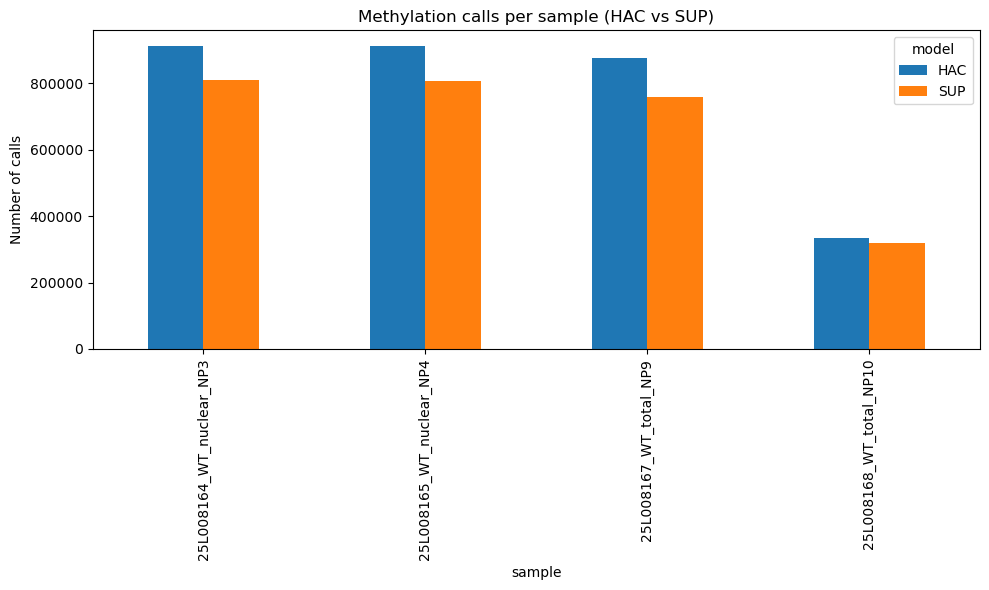

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# Define column names for modkit pileup (no header in file)
cols = [
    "chrom", "start", "end", "base", "score", "strand", "thickStart",
    "thickEnd", "itemRgb", "N_valid_cov", "fraction_modified",
    "N_mod", "N_canonical", "N_other_mod", "N_delete", "N_fail",
    "N_diff", "N_nocall"
]

def count_calls(path):
    """Count number of rows (sites) in a pileup file."""
    df = pd.read_csv(path, sep="\t", names=cols, comment="#")
    return len(df)  # or df["N_mod"].sum() if you prefer number of modified reads

# Path to your folder
folder = "//data/manke/processing1/erikson/20250814_m6A_modkit_hac/20250815_dorado.1.1.1/"

# Get all pileup files
files = glob.glob(os.path.join(folder, "*.bed"))

data = []
for f in files:
    if f.endswith("hac.bed"):
        sample = os.path.basename(f).replace(".hac.bed", "")
        model = "HAC"
    else:
        sample = os.path.basename(f).replace(".bed", "")
        model = "SUP"
    count = count_calls(f)
    data.append({"sample": sample, "model": model, "calls": count})

df = pd.DataFrame(data)

# Pivot so we can plot side-by-side bars
df_pivot = df.pivot(index="sample", columns="model", values="calls").fillna(0)

# Plot
ax = df_pivot.plot(
    kind="bar", figsize=(10,6),
    color={"HAC": "#1f77b4", "SUP": "#ff7f0e"}
)
plt.ylabel("Number of calls")
plt.title("Methylation calls per sample (HAC vs SUP)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Plot count of bases with more then  10 reads coverage

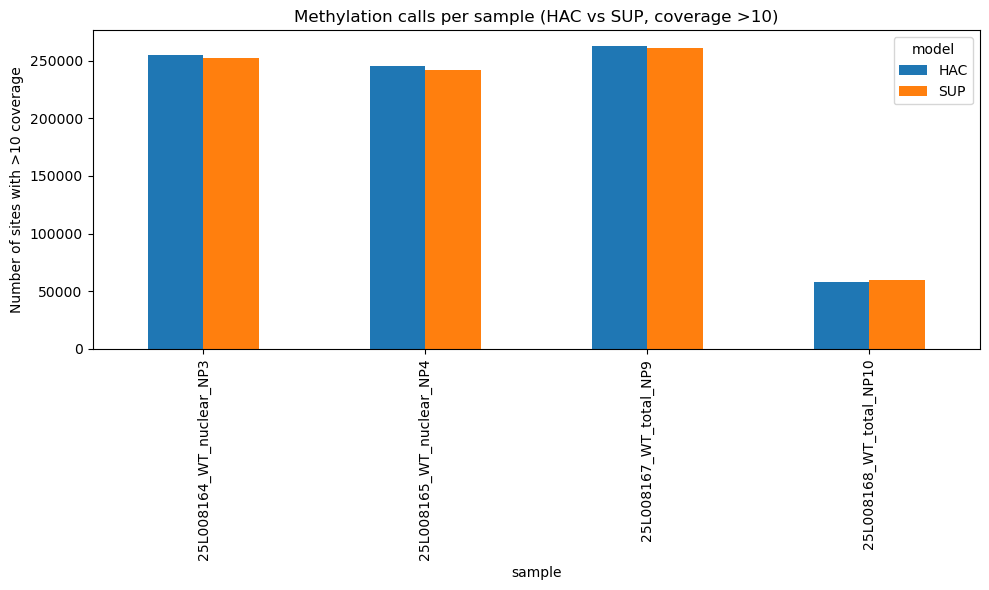

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# Define column names for modkit pileup (no header in file)
cols = [
    "chrom", "start", "end", "base", "score", "strand", "thickStart",
    "thickEnd", "itemRgb", "N_valid_cov", "fraction_modified",
    "N_mod", "N_canonical", "N_other_mod", "N_delete", "N_fail",
    "N_diff", "N_nocall"
]

def count_calls(path):
    """Count number of rows (sites) with >10 coverage in a pileup file."""
    df = pd.read_csv(path, sep="\t", names=cols, comment="#")
    df_filt = df[df["N_valid_cov"] > 10]
    return len(df_filt)

# Path to your folder
folder = "//data/manke/processing1/erikson/20250814_m6A_modkit_hac/20250815_dorado.1.1.1/"

# Get all pileup files
files = glob.glob(os.path.join(folder, "*.bed"))

data = []
for f in files:
    if f.endswith("hac.bed"):
        sample = os.path.basename(f).replace(".hac.bed", "")
        model = "HAC"
    else:
        sample = os.path.basename(f).replace(".bed", "")
        model = "SUP"
    count = count_calls(f)
    data.append({"sample": sample, "model": model, "calls": count})

df = pd.DataFrame(data)

# Pivot so we can plot side-by-side bars
df_pivot = df.pivot(index="sample", columns="model", values="calls").fillna(0)

# Plot
ax = df_pivot.plot(
    kind="bar", figsize=(10,6),
    color={"HAC": "#1f77b4", "SUP": "#ff7f0e"}
)
plt.ylabel("Number of sites with >10 coverage")
plt.title("Methylation calls per sample (HAC vs SUP, coverage >10)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Extract the bases where more then 50% are methylated

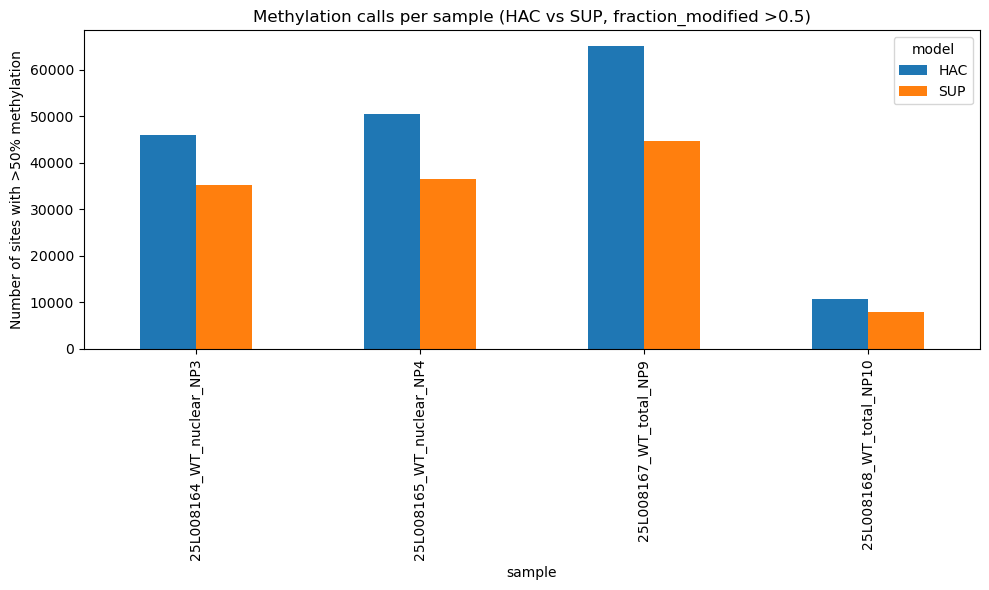

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# Define column names for modkit pileup (no header in file)
cols = [
    "chrom", "start", "end", "base", "score", "strand", "thickStart",
    "thickEnd", "itemRgb", "N_valid_cov", "fraction_modified",
    "N_mod", "N_canonical", "N_other_mod", "N_delete", "N_fail",
    "N_diff", "N_nocall"
]

def count_calls(path):
    """Count number of rows (sites) with fraction_modified > 0.5 in a pileup file."""
    df = pd.read_csv(path, sep="\t", names=cols, comment="#")
    df_filt = df[df["fraction_modified"] > 0.5]
    return len(df_filt)

# Path to your folder
folder = "//data/manke/processing1/erikson/20250814_m6A_modkit_hac/20250815_dorado.1.1.1/"

# Get all pileup files
files = glob.glob(os.path.join(folder, "*.bed"))

data = []
for f in files:
    if f.endswith("hac.bed"):
        sample = os.path.basename(f).replace(".hac.bed", "")
        model = "HAC"
    else:
        sample = os.path.basename(f).replace(".bed", "")
        model = "SUP"
    count = count_calls(f)
    data.append({"sample": sample, "model": model, "calls": count})

df = pd.DataFrame(data)

# Pivot so we can plot side-by-side bars
df_pivot = df.pivot(index="sample", columns="model", values="calls").fillna(0)

# Plot
ax = df_pivot.plot(
    kind="bar", figsize=(10,6),
    color={"HAC": "#1f77b4", "SUP": "#ff7f0e"}
)
plt.ylabel("Number of sites with >50% methylation")
plt.title("Methylation calls per sample (HAC vs SUP, fraction_modified >0.5)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Extract the bases where more then 50% are methylated AND coverage >10

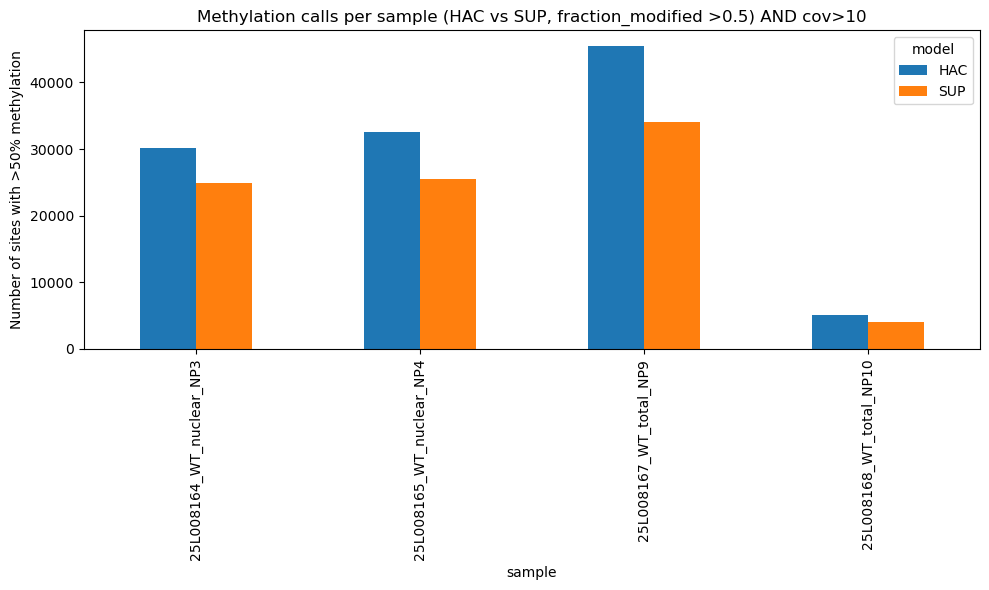

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# Define column names for modkit pileup (no header in file)
cols = [
    "chrom", "start", "end", "base", "score", "strand", "thickStart",
    "thickEnd", "itemRgb", "N_valid_cov", "fraction_modified",
    "N_mod", "N_canonical", "N_other_mod", "N_delete", "N_fail",
    "N_diff", "N_nocall"
]

def count_calls(path):
    """Count number of rows (sites) with fraction_modified > 0.5 in a pileup file."""
    df = pd.read_csv(path, sep="\t", names=cols, comment="#")
    df_filt = df[df["fraction_modified"] > 0.5]
    df_filt = df_filt[df_filt["N_valid_cov"] > 10]
    return len(df_filt)

# Path to your folder
folder = "//data/manke/processing1/erikson/20250814_m6A_modkit_hac/20250815_dorado.1.1.1/"

# Get all pileup files
files = glob.glob(os.path.join(folder, "*.bed"))

data = []
for f in files:
    if f.endswith("hac.bed"):
        sample = os.path.basename(f).replace(".hac.bed", "")
        model = "HAC"
    else:
        sample = os.path.basename(f).replace(".bed", "")
        model = "SUP"
    count = count_calls(f)
    data.append({"sample": sample, "model": model, "calls": count})

df = pd.DataFrame(data)

# Pivot so we can plot side-by-side bars
df_pivot = df.pivot(index="sample", columns="model", values="calls").fillna(0)

# Plot
ax = df_pivot.plot(
    kind="bar", figsize=(10,6),
    color={"HAC": "#1f77b4", "SUP": "#ff7f0e"}
)
plt.ylabel("Number of sites with >50% methylation")
plt.title("Methylation calls per sample (HAC vs SUP, fraction_modified >0.5) AND cov>10")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Extract the bases where more then 90% are methylated AND coverage >10

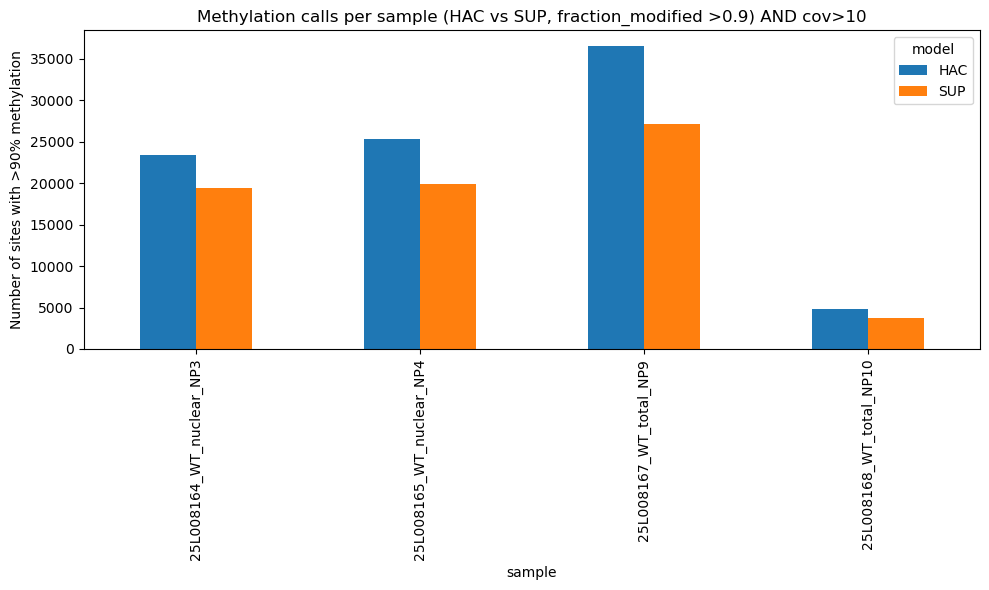

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# Define column names for modkit pileup (no header in file)
cols = [
    "chrom", "start", "end", "base", "score", "strand", "thickStart",
    "thickEnd", "itemRgb", "N_valid_cov", "fraction_modified",
    "N_mod", "N_canonical", "N_other_mod", "N_delete", "N_fail",
    "N_diff", "N_nocall"
]

def count_calls(path):
    """Count number of rows (sites) with fraction_modified > 0.9 in a pileup file."""
    df = pd.read_csv(path, sep="\t", names=cols, comment="#")
    df_filt = df[df["fraction_modified"] > 0.9]
    df_filt = df_filt[df_filt["N_valid_cov"] > 10]
    return len(df_filt)

# Path to your folder
folder = "//data/manke/processing1/erikson/20250814_m6A_modkit_hac/20250815_dorado.1.1.1/"

# Get all pileup files
files = glob.glob(os.path.join(folder, "*.bed"))

data = []
for f in files:
    if f.endswith("hac.bed"):
        sample = os.path.basename(f).replace(".hac.bed", "")
        model = "HAC"
    else:
        sample = os.path.basename(f).replace(".bed", "")
        model = "SUP"
    count = count_calls(f)
    data.append({"sample": sample, "model": model, "calls": count})

df = pd.DataFrame(data)

# Pivot so we can plot side-by-side bars
df_pivot = df.pivot(index="sample", columns="model", values="calls").fillna(0)

# Plot
ax = df_pivot.plot(
    kind="bar", figsize=(10,6),
    color={"HAC": "#1f77b4", "SUP": "#ff7f0e"}
)
plt.ylabel("Number of sites with >90% methylation")
plt.title("Methylation calls per sample (HAC vs SUP, fraction_modified >0.9) AND cov>10")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Correlation plot hac vs sup

25L008164_WT_nuclear_NP3: correlation = 0.969 (n=246292)


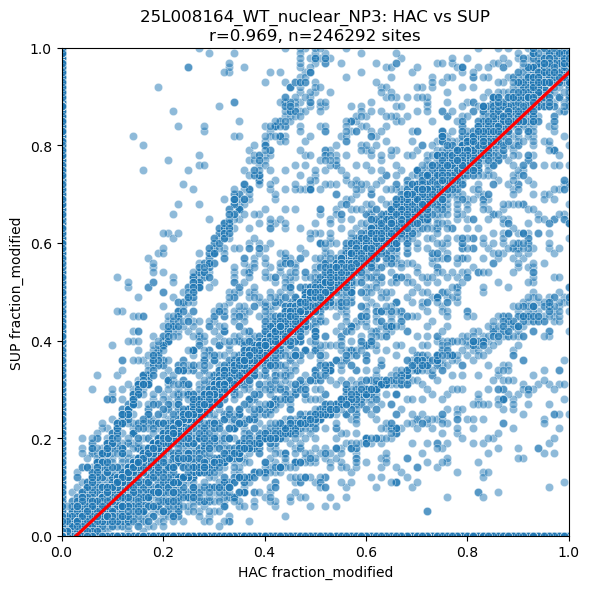

25L008165_WT_nuclear_NP4: correlation = 0.956 (n=236170)


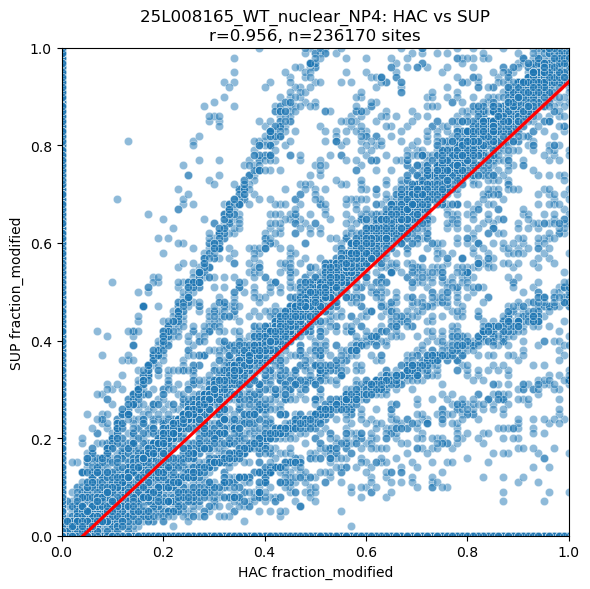

25L008167_WT_total_NP9: correlation = 0.955 (n=255972)


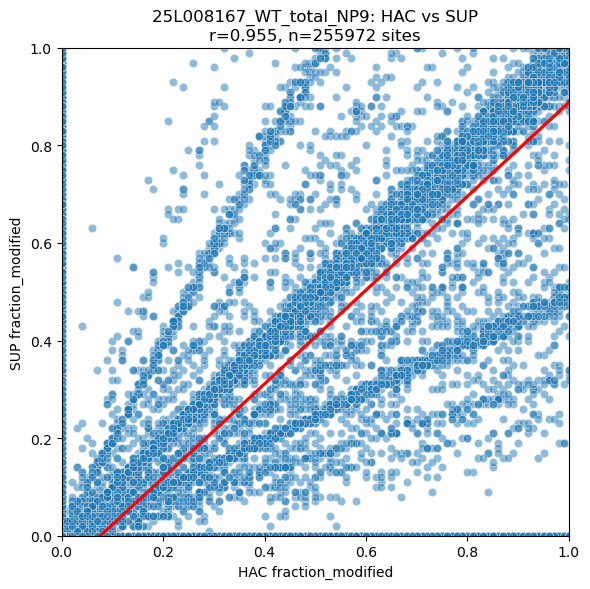

25L008168_WT_total_NP10: correlation = 0.876 (n=56465)


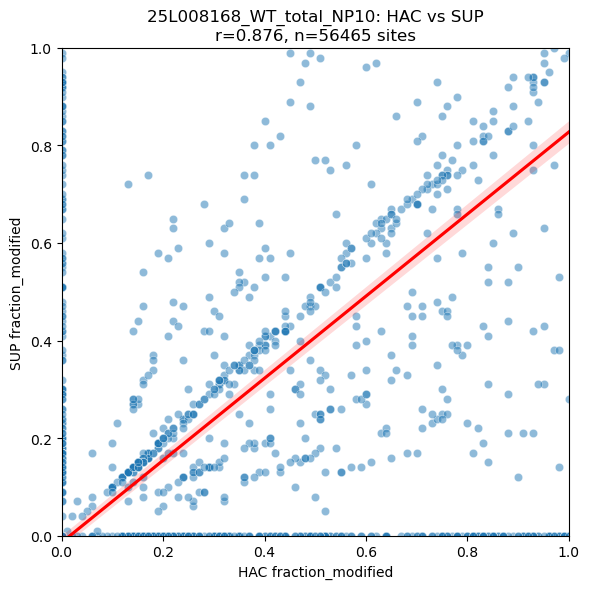

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

# Column names for modkit pileup
cols = [
    "chrom", "start", "end", "base", "score", "strand", "thickStart",
    "thickEnd", "itemRgb", "N_valid_cov", "fraction_modified",
    "N_mod", "N_canonical", "N_other_mod", "N_delete", "N_fail",
    "N_diff", "N_nocall"
]

def load_and_filter(path):
    """Load pileup file and filter sites with >0.9 fraction and >10 coverage."""
    df = pd.read_csv(path, sep="\t", names=cols, comment="#")
    df = df[df["N_valid_cov"] > 10]
    df = df[["chrom","start","end","strand","fraction_modified"]]
    return df

# Path to folder
folder = "//data/manke/processing1/erikson/20250814_m6A_modkit_hac/20250815_dorado.1.1.1/"
files = glob.glob(os.path.join(folder, "*.bed"))

# Organize files by sample + model
samples = {}
for f in files:
    if f.endswith("hac.bed"):
        sample = os.path.basename(f).replace(".hac.bed", "")
        model = "HAC"
    else:
        sample = os.path.basename(f).replace(".bed", "")
        model = "SUP"
    samples.setdefault(sample, {})[model] = f

# Make correlation plots
for sample, models in samples.items():
    if "HAC" in models and "SUP" in models:
        # Load filtered data
        df_hac = load_and_filter(models["HAC"]).rename(columns={"fraction_modified":"HAC"})
        df_sup = load_and_filter(models["SUP"]).rename(columns={"fraction_modified":"SUP"})
        
        # Merge by genomic coordinate
        merged = pd.merge(
            df_hac, df_sup,
            on=["chrom","start","end","strand"],
            how="inner"
        )
        
        if len(merged) == 0:
            print(f"⚠️ No overlapping sites for {sample}")
            continue
        
        # Correlation
        corr = merged["HAC"].corr(merged["SUP"])
        print(f"{sample}: correlation = {corr:.3f} (n={len(merged)})")
        
        # Scatterplot
        plt.figure(figsize=(6,6))
        sns.scatterplot(data=merged, x="HAC", y="SUP", alpha=0.5)
        sns.regplot(data=merged, x="HAC", y="SUP", scatter=False, color="red")
        plt.title(f"{sample}: HAC vs SUP\nr={corr:.3f}, n={len(merged)} sites")
        plt.xlabel("HAC fraction_modified")
        plt.ylabel("SUP fraction_modified")
        plt.xlim(0,1)
        plt.ylim(0,1)
        plt.tight_layout()
        plt.show()

how many sites fall into “agreement” vs “disagreement” bins (e.g. |HAC−SUP| > 0.2)

absolute difference in fraction_modified at each site

Agreement: |HAC – SUP| ≤ 0.1

Moderate disagreement: 0.1 < |HAC – SUP| ≤ 0.2

Strong disagreement: |HAC – SUP| > 0.2


25L008164_WT_nuclear_NP3: n=246292
category
Agreement (≤0.1)      215144
Moderate (0.1–0.2)      4686
Disagrement (>0.2)     15179
Name: 25L008164_WT_nuclear_NP3, dtype: int64

25L008167_WT_total_NP9: n=255972
category
Agreement (≤0.1)      209884
Moderate (0.1–0.2)      4419
Disagrement (>0.2)     19630
Name: 25L008167_WT_total_NP9, dtype: int64

25L008165_WT_nuclear_NP4: n=236170
category
Agreement (≤0.1)      201225
Moderate (0.1–0.2)      4693
Disagrement (>0.2)     16773
Name: 25L008165_WT_nuclear_NP4, dtype: int64

25L008168_WT_total_NP10: n=56465
category
Agreement (≤0.1)      51443
Moderate (0.1–0.2)      473
Disagrement (>0.2)     1500
Name: 25L008168_WT_total_NP10, dtype: int64



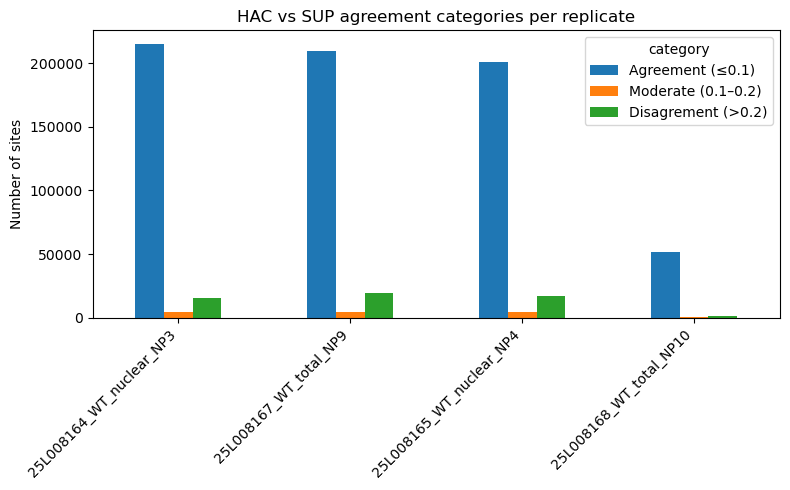

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# Column names for modkit pileup
cols = [
    "chrom", "start", "end", "base", "score", "strand", "thickStart",
    "thickEnd", "itemRgb", "N_valid_cov", "fraction_modified",
    "N_mod", "N_canonical", "N_other_mod", "N_delete", "N_fail",
    "N_diff", "N_nocall"
]

def load_pileup(path):
    """Load pileup and filter."""
    df = pd.read_csv(path, sep="\t", names=cols, comment="#")
    df = df[(df["N_valid_cov"] > 10)]
    df["site_id"] = df["chrom"].astype(str) + ":" + df["start"].astype(str) + ":" + df["end"].astype(str) + ":" + df["strand"]
    return df[["site_id", "fraction_modified"]]

def compare_hac_sup(folder):

    """Compare HAC vs SUP models in a folder."""
    hac_files = glob.glob(os.path.join(folder, "*hac.bed"))
    sup_files = glob.glob(os.path.join(folder, "*.bed"))
    sup_files = [f for f in sup_files if not f.endswith("hac.bed")]

    all_results = []

    for hac in hac_files:
        # Find matching SUP file (same sample name without 'hac')
        base = os.path.basename(hac).replace(".hac.bed", "").replace("hac.bed", "")
        sup = [s for s in sup_files if base in os.path.basename(s)]
        if not sup:
            continue
        sup = sup[0]

        # Load both
        df_hac = load_pileup(hac).rename(columns={"fraction_modified":"HAC_fraction_modified"})
        df_sup = load_pileup(sup).rename(columns={"fraction_modified":"SUP_fraction_modified"})

        # Merge by site
        merged = pd.merge(df_hac, df_sup, on="site_id", how="inner")

        # Compute difference
        merged["diff"] = (merged["HAC_fraction_modified"] - merged["SUP_fraction_modified"]).abs()

        # Categorize
        bins = [0, 0.1, 0.2, 1.0]
        labels = ["Agreement (≤0.1)", "Moderate (0.1–0.2)", "Disagrement (>0.2)"]
        merged["category"] = pd.cut(merged["diff"], bins=bins, labels=labels, include_lowest=True)

        # Count categories
        counts = merged["category"].value_counts().reindex(labels)
        counts = counts.rename(base)
        all_results.append(counts)

        # Print summary
        print(f"{base}: n={len(merged)}")
        print(counts)
        print()

    # Combine across samples
    results = pd.DataFrame(all_results)
    return results

folder = "//data/manke/processing1/erikson/20250814_m6A_modkit_hac/20250815_dorado.1.1.1/"
results = compare_hac_sup(folder)

# Plot grouped barplot
results.plot(kind="bar", stacked=False, figsize=(8,5))
plt.ylabel("Number of sites")
plt.title("HAC vs SUP agreement categories per replicate")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Looking at the hac vs sup only

25L008164_WT_nuclear_NP3: Only HAC = 8386, Only SUP = 5956
25L008167_WT_total_NP9: Only HAC = 7067, Only SUP = 4800
25L008165_WT_nuclear_NP4: Only HAC = 9151, Only SUP = 5917
25L008168_WT_total_NP10: Only HAC = 2011, Only SUP = 3568


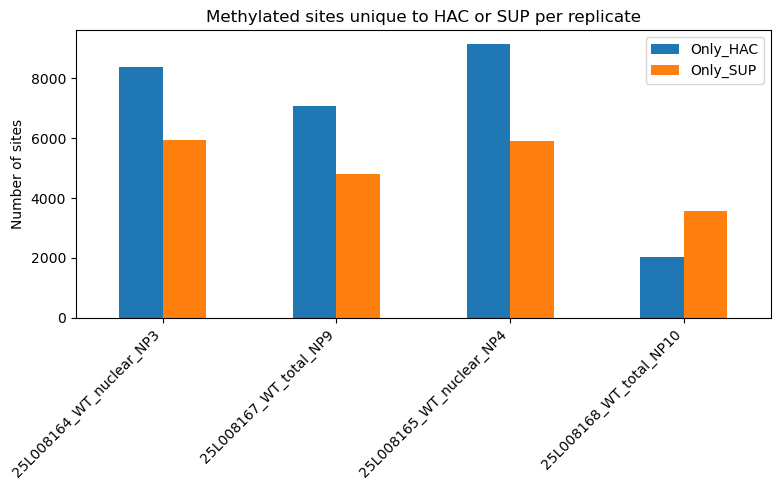

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# Column names for modkit pileup
cols = [
    "chrom", "start", "end", "base", "score", "strand", "thickStart",
    "thickEnd", "itemRgb", "N_valid_cov", "fraction_modified",
    "N_mod", "N_canonical", "N_other_mod", "N_delete", "N_fail",
    "N_diff", "N_nocall"
]

def load_pileup(path):
    """Load pileup and filter."""
    df = pd.read_csv(path, sep="\t", names=cols, comment="#")
    df = df[(df["N_valid_cov"] > 10)]
    df["site_id"] = df["chrom"].astype(str) + ":" + df["start"].astype(str) + ":" + df["end"].astype(str) + ":" + df["strand"]
    return df[["site_id", "fraction_modified"]]

def exclusive_sites(folder):
    """Count methylated sites present only in HAC or only in SUP per sample."""
    hac_files = glob.glob(os.path.join(folder, "*hac.bed"))
    sup_files = glob.glob(os.path.join(folder, "*.bed"))
    sup_files = [f for f in sup_files if not f.endswith("hac.bed")]

    all_results = []

    for hac in hac_files:
        base = os.path.basename(hac).replace(".hac.bed", "").replace("hac.bed", "")
        sup = [s for s in sup_files if base in os.path.basename(s)]
        if not sup:
            continue
        sup = sup[0]

        df_hac = load_pileup(hac)
        df_sup = load_pileup(sup)

        # Sites unique to HAC
        only_hac = df_hac[~df_hac["site_id"].isin(df_sup["site_id"])]
        # Sites unique to SUP
        only_sup = df_sup[~df_sup["site_id"].isin(df_hac["site_id"])]

        counts = pd.Series({
            "Only_HAC": len(only_hac),
            "Only_SUP": len(only_sup)
        }, name=base)
        all_results.append(counts)

        print(f"{base}: Only HAC = {len(only_hac)}, Only SUP = {len(only_sup)}")

    # Combine across samples
    results = pd.DataFrame(all_results)
    return results

folder = "//data/manke/processing1/erikson/20250814_m6A_modkit_hac/20250815_dorado.1.1.1/"
results = exclusive_sites(folder)

# Plot grouped barplot
results.plot(kind="bar", stacked=False, figsize=(8,5))
plt.ylabel("Number of sites")
plt.title("Methylated sites unique to HAC or SUP per replicate")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Do these "only HAC and only SUP" come from complex/repetitive regions

In [1]:
import pandas as pd
import glob
import os
import pybedtools

# Define pileup columns
cols = [
    "chrom", "start", "end", "base", "score", "strand", "thickStart",
    "thickEnd", "itemRgb", "N_valid_cov", "fraction_modified",
    "N_mod", "N_canonical", "N_other_mod", "N_delete", "N_fail",
    "N_diff", "N_nocall"
]

def load_pileup(path):
    """Load pileup and filter for high-confidence methylated sites."""
    df = pd.read_csv(path, sep="\t", names=cols, comment="#")
    df = df[(df["fraction_modified"] > 0.9) & (df["N_valid_cov"] > 10)]
    df["site_id"] = df["chrom"].astype(str) + ":" + df["start"].astype(str) + ":" + df["end"].astype(str) + ":" + df["strand"]
    return df[["chrom", "start", "end", "strand", "site_id"]]

def save_only_sites(folder, repeat_bed=None):
    """Extract only HAC or SUP sites and optionally annotate repeats."""
    hac_files = glob.glob(os.path.join(folder, "*hac.bed"))
    sup_files = glob.glob(os.path.join(folder, "*.bed"))
    sup_files = [f for f in sup_files if not f.endswith("hac.bed")]


    # Load repeat BED and remove 'chr' prefix
    repeat_bt = None
    if repeat_bed:
        repeats_df = pd.read_csv(repeat_bed, sep="\t", header=None)
        repeats_df[0] = repeats_df[0].str.replace("chr", "")  # remove chr prefix
        repeat_bt = pybedtools.BedTool.from_dataframe(repeats_df)

    for hac in hac_files:
        base = os.path.basename(hac).replace(".hac.bed", "").replace("hac.bed", "")
        sup = [s for s in sup_files if base in os.path.basename(s)]
        if not sup:
            continue
        sup = sup[0]

        df_hac = load_pileup(hac)
        df_sup = load_pileup(sup)

        # Sites unique to HAC/SUP
        only_hac = df_hac[~df_hac["site_id"].isin(df_sup["site_id"])]
        only_sup = df_sup[~df_sup["site_id"].isin(df_hac["site_id"])]

        # Convert to BedTool for intersection
        bt_hac = pybedtools.BedTool.from_dataframe(only_hac[["chrom", "start", "end"]])
        bt_sup = pybedtools.BedTool.from_dataframe(only_sup[["chrom", "start", "end"]])

        if repeat_bt:
            hac_in_repeat = bt_hac.intersect(repeat_bt, u=True).to_dataframe(names=["chrom","start","end"])
            sup_in_repeat = bt_sup.intersect(repeat_bt, u=True).to_dataframe(names=["chrom","start","end"])
            print(f"{base}: Only HAC in repeats = {len(hac_in_repeat)}, Only SUP in repeats = {len(sup_in_repeat)}")
        else:
            print(f"{base}: Only HAC = {len(only_hac)}, Only SUP = {len(only_sup)}")

        # Save BED files for further analysis
        only_hac.to_csv(f"{base}_only_HAC.bed", sep="\t", index=False, header=False)
        only_sup.to_csv(f"{base}_only_SUP.bed", sep="\t", index=False, header=False)

        if repeat_bt:
            hac_in_repeat.to_csv(f"{base}_only_HAC_in_repeats.bed", sep="\t", index=False, header=False)
            sup_in_repeat.to_csv(f"{base}_only_SUP_in_repeats.bed", sep="\t", index=False, header=False)

# Example usage
folder = "//data/manke/processing1/erikson/20250814_m6A_modkit_hac/20250815_dorado.1.1.1/"
repeat_bed = "/data/repository/organisms/dm6_ensembl/TEsmall/dm6/genomes/annotation/TE.bed"  # BED file of repeats
save_only_sites(folder, repeat_bed)

25L008164_WT_nuclear_NP3: Only HAC in repeats = 128, Only SUP in repeats = 139
25L008167_WT_total_NP9: Only HAC in repeats = 42, Only SUP in repeats = 39
25L008165_WT_nuclear_NP4: Only HAC in repeats = 162, Only SUP in repeats = 149
25L008168_WT_total_NP10: Only HAC in repeats = 2, Only SUP in repeats = 0


Look at other variants

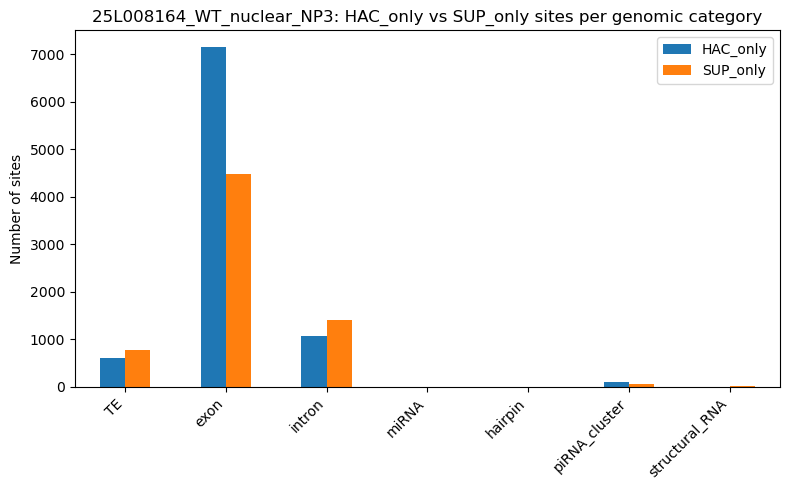

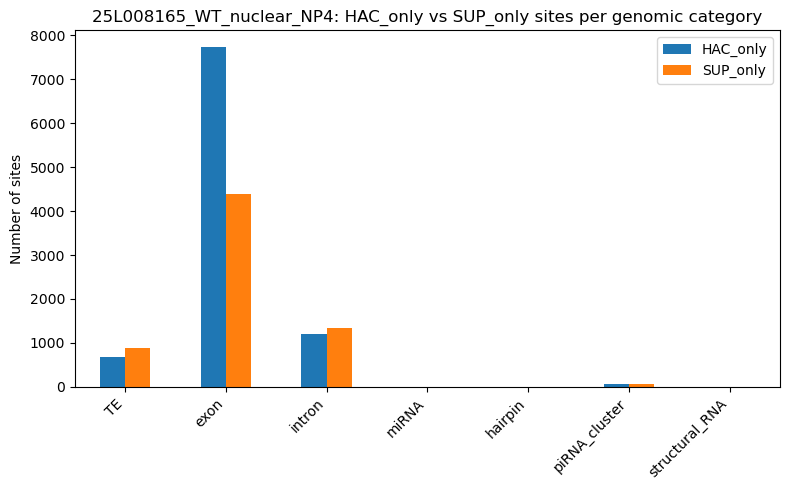

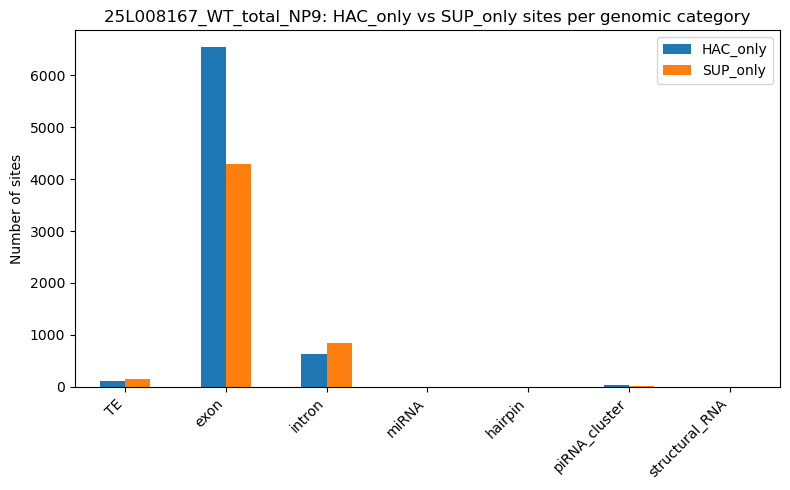

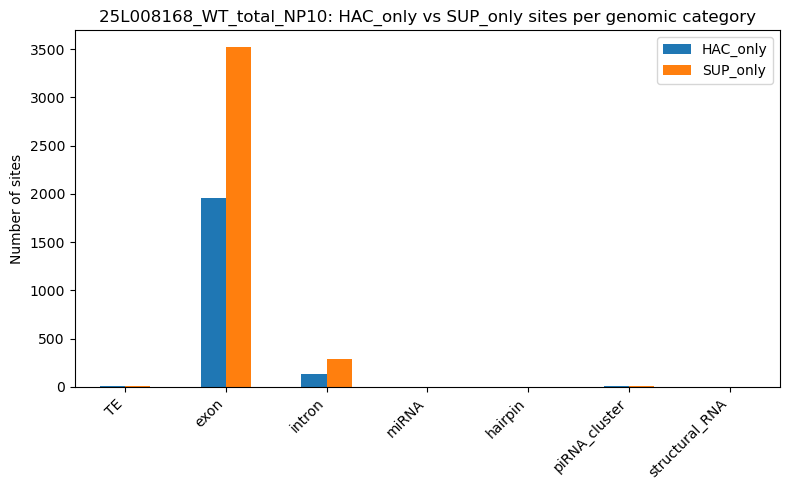

In [10]:
import pandas as pd
import glob
import os
import pybedtools
import matplotlib.pyplot as plt

# Columns for modkit pileup
cols = [
    "chrom", "start", "end", "base", "score", "strand", "thickStart",
    "thickEnd", "itemRgb", "N_valid_cov", "fraction_modified",
    "N_mod", "N_canonical", "N_other_mod", "N_delete", "N_fail",
    "N_diff", "N_nocall"
]

def load_pileup(path):
    """Load pileup and filter high-confidence sites."""
    df = pd.read_csv(path, sep="\t", names=cols, comment="#")
    df = df[(df["N_valid_cov"] > 10)]
    df["chrom"] = df["chrom"].str.replace("chr", "")
    df["site_id"] = df["chrom"].astype(str) + ":" + df["start"].astype(str) + ":" + df["end"].astype(str) + ":" + df["strand"]
    return df[["chrom", "start", "end", "strand", "site_id"]]

def load_annotation_bed(bed_file):
    folder="/data/repository/organisms/dm6_ensembl/TEsmall/dm6/genomes/annotation/"
    files = glob.glob(os.path.join(folder, bed_file))
    if not files:
        raise FileNotFoundError(f"No files found for {bed_file}")
    df = pd.read_csv(files[0], sep="\t", header=None)  # Use the first matched file
    df[0] = df[0].str.replace("chr", "")
    return pybedtools.BedTool.from_dataframe(df)

def categorize_sites(only_sites_bt, annotations):
    """Intersect a set of sites with multiple genomic annotations."""
    counts = {}
    for cat, ann_bt in annotations.items():
        intersect = only_sites_bt.intersect(ann_bt, u=True)
        counts[cat] = len(intersect)
    return counts

def process_samples(folder, annotation_files):
    hac_files = glob.glob(os.path.join(folder, "*hac.bed"))
    sup_files = glob.glob(os.path.join(folder, "*.bed"))
    sup_files = [f for f in sup_files if not f.endswith("hac.bed")]

    # Load all annotations
    annotations = {f.split(".")[0]: load_annotation_bed(f) for f in annotation_files}

    all_counts = []

    for hac in hac_files:
        base = os.path.basename(hac).replace(".hac.bed","").replace("hac.bed","")
        sup = [s for s in sup_files if base in os.path.basename(s)]
        if not sup:
            continue
        sup = sup[0]

        df_hac = load_pileup(hac)
        df_sup = load_pileup(sup)

        only_hac = df_hac[~df_hac["site_id"].isin(df_sup["site_id"])]
        only_sup = df_sup[~df_sup["site_id"].isin(df_hac["site_id"])]

        bt_hac = pybedtools.BedTool.from_dataframe(only_hac[["chrom","start","end"]])
        bt_sup = pybedtools.BedTool.from_dataframe(only_sup[["chrom","start","end"]])

        hac_counts = categorize_sites(bt_hac, annotations)
        sup_counts = categorize_sites(bt_sup, annotations)

        sample_df = pd.DataFrame([hac_counts, sup_counts], index=["HAC_only", "SUP_only"])
        sample_df["sample"] = base
        all_counts.append(sample_df)

    return pd.concat(all_counts)

# Specify folder and annotation files
folder = "//data/manke/processing1/erikson/20250814_m6A_modkit_hac/20250815_dorado.1.1.1/"
annotation_files = [
    "TE.bed", "exon.bed", "intron.bed", "miRNA.bed",
    "hairpin.bed", "piRNA_cluster.bed", "structural_RNA.bed"
]

counts_df = process_samples(folder, annotation_files)

# Plot barplot per sample
for sample, group in counts_df.groupby("sample"):
    group.drop(columns="sample").T.plot(kind="bar", figsize=(8,5))
    plt.title(f"{sample}: HAC_only vs SUP_only sites per genomic category")
    plt.ylabel("Number of sites")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()